In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style='whitegrid')


In [12]:
# Load dataset
df = pd.read_csv('../data/ecommerce_data.csv', encoding='ISO-8859-1')

# Preview
print(f"Shape: {df.shape}")
df.head()


Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
df.dropna(subset=['CustomerID'], inplace=True)


In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
#These are return/refund transactions that shouldn't count as actual sales
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [21]:
df['Revenue'] = df['Quantity']*df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df['Month'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [29]:
monthly_kpis = df.groupby('Month').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'CustomerID':pd.Series.nunique,
    'InvoiceNo':pd.Series.nunique
}).reset_index()

monthly_kpis.columns = ['Month', 'TotalRevenue', 'TotalQuantity', 'ActiveCustomers', 'TotalOrders']
monthly_kpis.head(13)

,Month,TotalRevenue,TotalQuantity,ActiveCustomers,TotalOrders
0,2010-12-01,572713.890,312265,885,1400
1,2011-01-01,569445.040,349098,741,987
2,2011-02-01,447137.350,265622,758,997
3,2011-03-01,595500.760,348503,974,1321
4,2011-04-01,469200.361,292222,856,1149
5,2011-05-01,678594.560,373601,1056,1555
6,2011-06-01,661213.690,363699,991,1393
7,2011-07-01,600091.011,369420,949,1331
8,2011-08-01,645343.900,398121,935,1280
9,2011-09-01,952838.382,544897,1266,1755


In [30]:
monthly_kpis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            13 non-null     datetime64[ns]
 1   TotalRevenue     13 non-null     float64       
 2   TotalQuantity    13 non-null     int64         
 3   ActiveCustomers  13 non-null     int64         
 4   TotalOrders      13 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 648.0 bytes


In [30]:
print(f"Data covers from {monthly_kpis['Month'].min().date()} to {monthly_kpis['Month'].max().date()}")


Data covers from 2010-12-01 to 2011-12-01


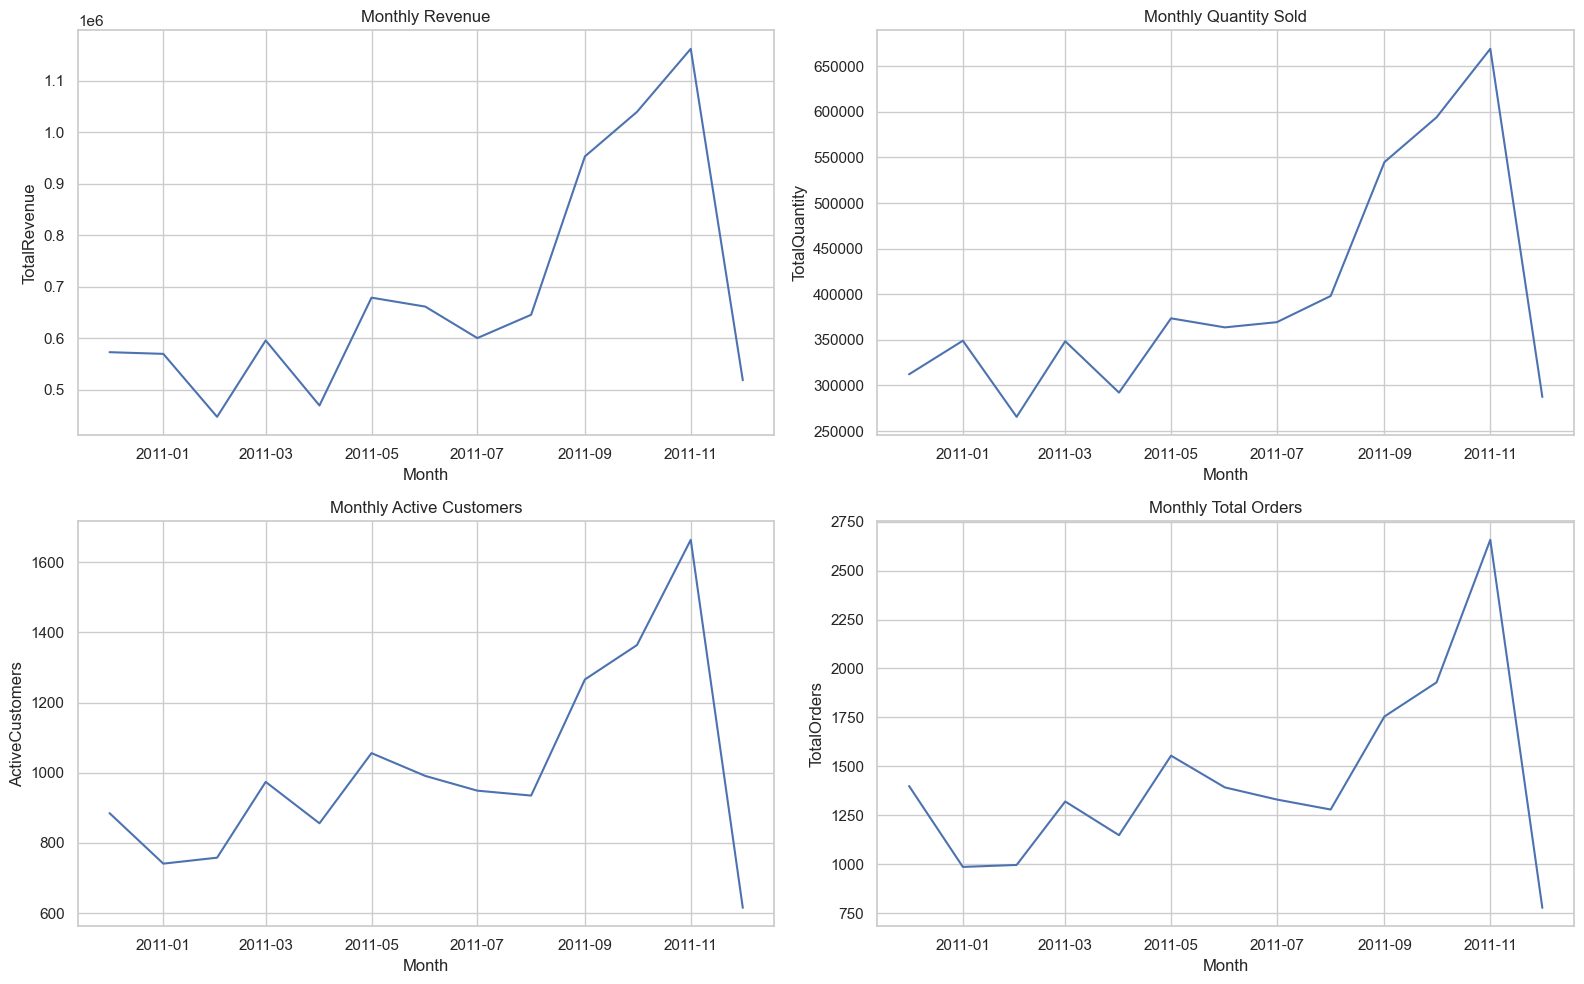

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Revenue
sns.lineplot(data=monthly_kpis, x='Month', y='TotalRevenue', ax=axs[0, 0])
axs[0, 0].set_title("Monthly Revenue")

# Quantity
sns.lineplot(data=monthly_kpis, x='Month', y='TotalQuantity', ax=axs[0, 1])
axs[0, 1].set_title("Monthly Quantity Sold")

# Customers
sns.lineplot(data=monthly_kpis, x='Month', y='ActiveCustomers', ax=axs[1, 0])
axs[1, 0].set_title("Monthly Active Customers")

# Orders
sns.lineplot(data=monthly_kpis, x='Month', y='TotalOrders', ax=axs[1, 1])
axs[1, 1].set_title("Monthly Total Orders")

plt.tight_layout()
plt.show()


In [44]:
monthly_kpis.to_csv('../data/monthly_kpis.csv', index=False)


In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

In [49]:
from prophet import Prophet

# Prepare data
revenue_df = monthly_kpis[['Month', 'TotalRevenue']].rename(columns={
    'Month': 'ds',
    'TotalRevenue': 'y'
})


In [50]:
model = Prophet()
model.fit(revenue_df)


19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
future = model.make_future_dataframe(periods=6, freq='M')
revenue_forecast = model.predict(future)


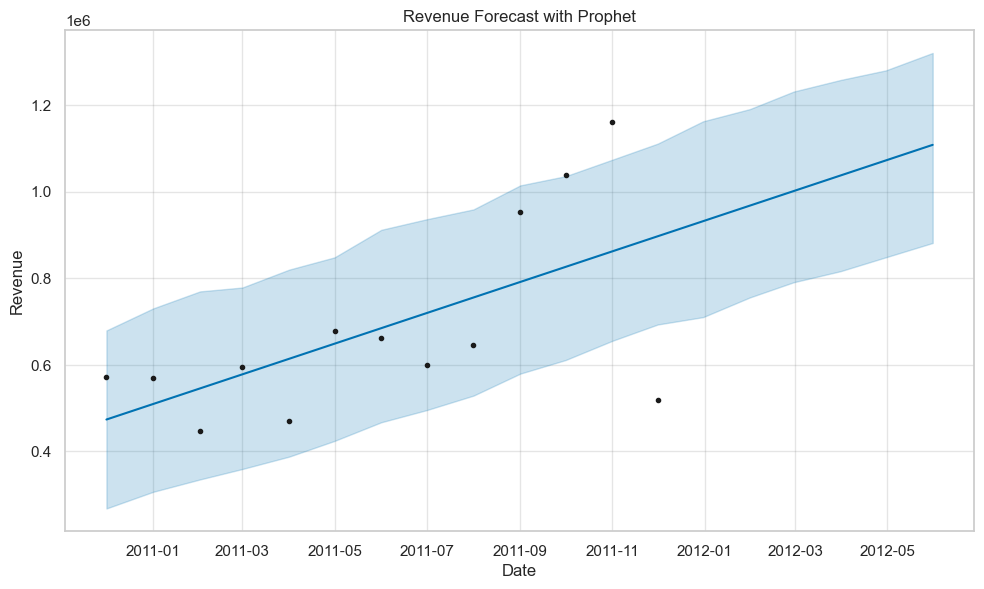

In [52]:
fig = model.plot(revenue_forecast)
plt.title("Revenue Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


In [56]:
revenue_forecast[['ds', 'yhat']].to_csv('../data/revenue_forecast.csv', index=False)

17:08:35 - cmdstanpy - INFO - Chain [1] start processing
17:08:35 - cmdstanpy - INFO - Chain [1] done processing


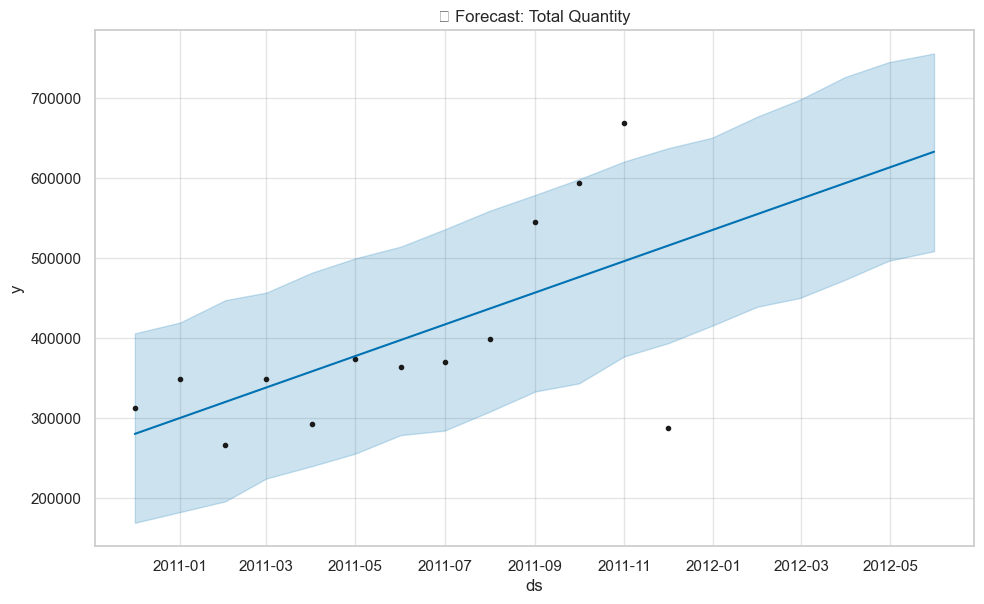

In [37]:

from prophet import Prophet

# Prepare data
quantity_df = monthly_kpis[['Month', 'TotalQuantity']].rename(columns={
    'Month': 'ds',
    'TotalQuantity': 'y'
})

# Fit model
quantity_model = Prophet()
quantity_model.fit(quantity_df)

# Forecast
quantity_future = quantity_model.make_future_dataframe(periods=6, freq='M')
quantity_forecast = quantity_model.predict(quantity_future)

# Plot
quantity_model.plot(quantity_forecast)
plt.title(" Forecast: Total Quantity")
plt.show()


In [57]:
quantity_forecast[['ds', 'yhat']].to_csv('../data/quantity_forecast.csv', index=False)

17:09:06 - cmdstanpy - INFO - Chain [1] start processing
17:09:06 - cmdstanpy - INFO - Chain [1] done processing


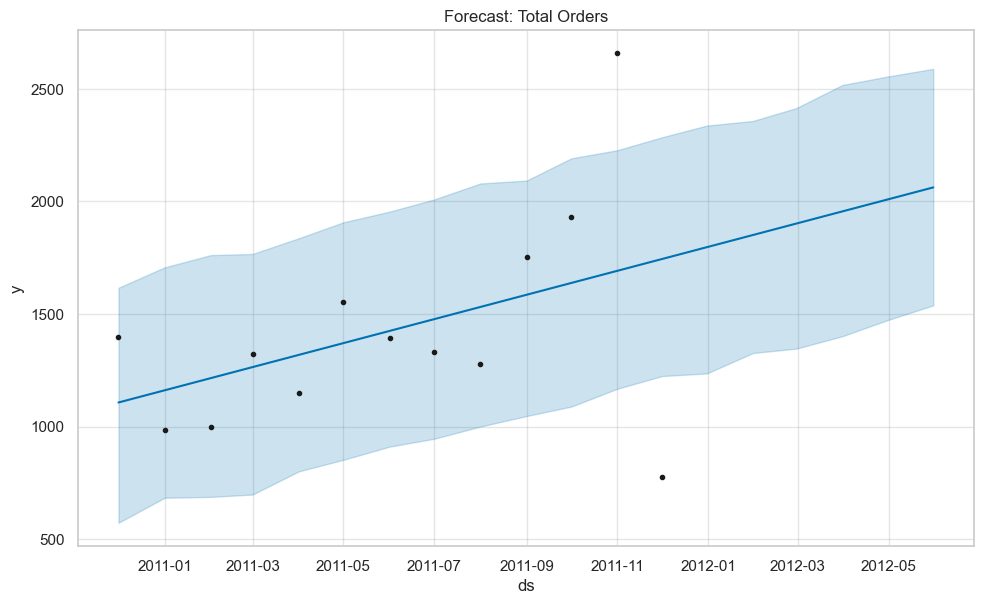

In [38]:
orders_df = monthly_kpis[['Month', 'TotalOrders']].rename(columns={
    'Month': 'ds',
    'TotalOrders': 'y'
})

orders_model = Prophet()
orders_model.fit(orders_df)

orders_future = orders_model.make_future_dataframe(periods=6, freq='M')
orders_forecast = orders_model.predict(orders_future)

orders_model.plot(orders_forecast)
plt.title("Forecast: Total Orders")
plt.show()


In [58]:
orders_forecast[['ds', 'yhat']].to_csv('../data/orders_forecast.csv', index=False)

In [39]:
!pip install statsmodels


   ---------------------------------------- 9.1/9.1 MB 678.3 kB/s eta 0:00:00
   -------------------------------------- 232.9/232.9 kB 296.9 kB/s eta 0:00:00


In [61]:
# Prepare historical
rev_arima = monthly_kpis[['Month', 'TotalRevenue']].copy()
rev_arima.set_index('Month', inplace=True)

# Fit ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(rev_arima, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast next 6 months
forecast = results.get_forecast(steps=6)
pred_mean = forecast.predicted_mean

# Create new df for forecast
forecast_df = pred_mean.reset_index()
forecast_df.columns = ['Month', 'Revenue_ARIMA']

# Historical + Forecast Combined
historical_df = rev_arima.reset_index().rename(columns={'TotalRevenue': 'Revenue_ARIMA'})
full_forecast = pd.concat([historical_df, forecast_df], axis=0).reset_index(drop=True)

# Final shape and preview
print(full_forecast.shape)
full_forecast.tail()


(19, 2)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Month,Revenue_ARIMA
14,2012-02-01,392616.250
15,2012-03-01,540979.660
16,2012-04-01,414679.261
17,2012-05-01,624073.460
18,2012-06-01,606692.590


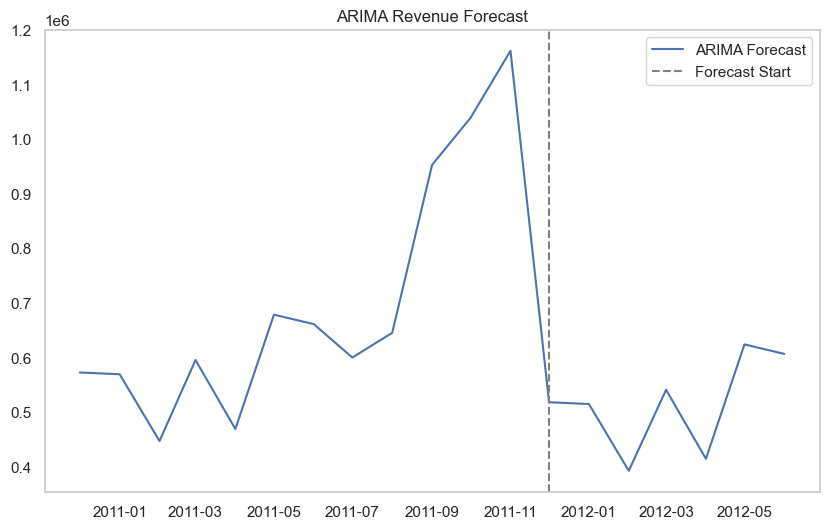

In [43]:
plt.figure(figsize=(10,6))
plt.plot(full_forecast['Month'], full_forecast['Revenue_ARIMA'], label='ARIMA Forecast')
plt.axvline(x=monthly_kpis['Month'].max(), color='gray', linestyle='--', label='Forecast Start')
plt.title("ARIMA Revenue Forecast")
plt.legend()
plt.grid()
plt.show()


In [59]:
full_forecast.to_csv('../data/arima_revenue_forecast.csv', index=False)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


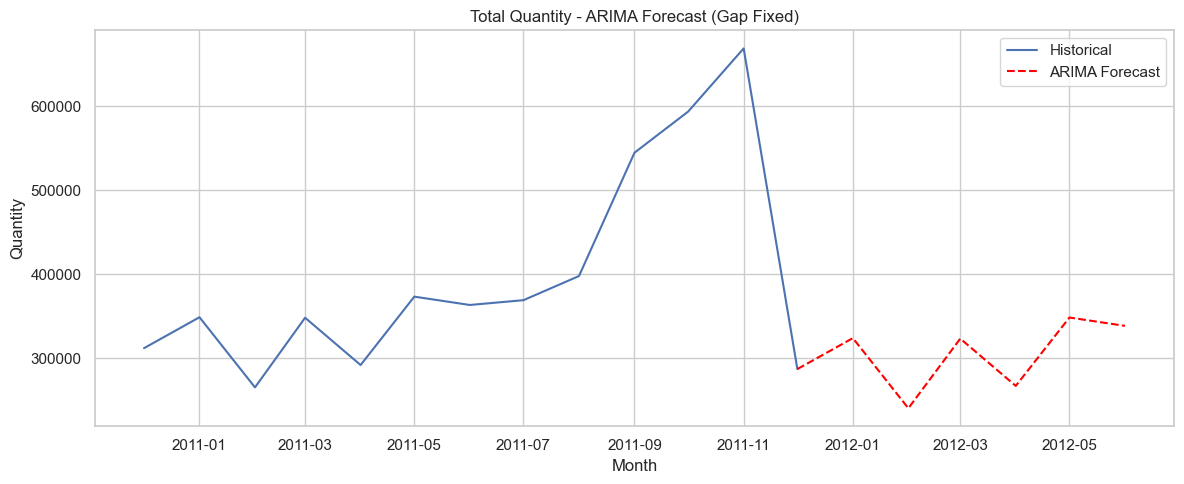

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare data
monthly_kpis = pd.read_csv("../data/monthly_kpis.csv")
monthly_kpis['Month'] = pd.to_datetime(monthly_kpis['Month'])
monthly_kpis.set_index('Month', inplace=True)

# Fit ARIMA model
model_q = SARIMAX(monthly_kpis['TotalQuantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
results_q = model_q.fit()

# Forecast 6 future steps
forecast_q = results_q.get_forecast(steps=6)
pred_mean_q = forecast_q.predicted_mean

# Fix gap by including last historical month in forecast line
last_point = monthly_kpis['TotalQuantity'].iloc[-1]
last_month = monthly_kpis.index[-1]
pred_mean_q_fixed = pd.concat([pd.Series([last_point], index=[last_month]), pred_mean_q])

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_kpis.index, monthly_kpis['TotalQuantity'], label='Historical')
plt.plot(pred_mean_q_fixed.index, pred_mean_q_fixed, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('Total Quantity - ARIMA Forecast (Gap Fixed)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
quantity_forecast_df = pred_mean_q_fixed.reset_index()
quantity_forecast_df.columns = ['Month', 'Quantity_ARIMA']
quantity_forecast_df.to_csv("../data/quantity_arima_forecast.csv", index=False)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


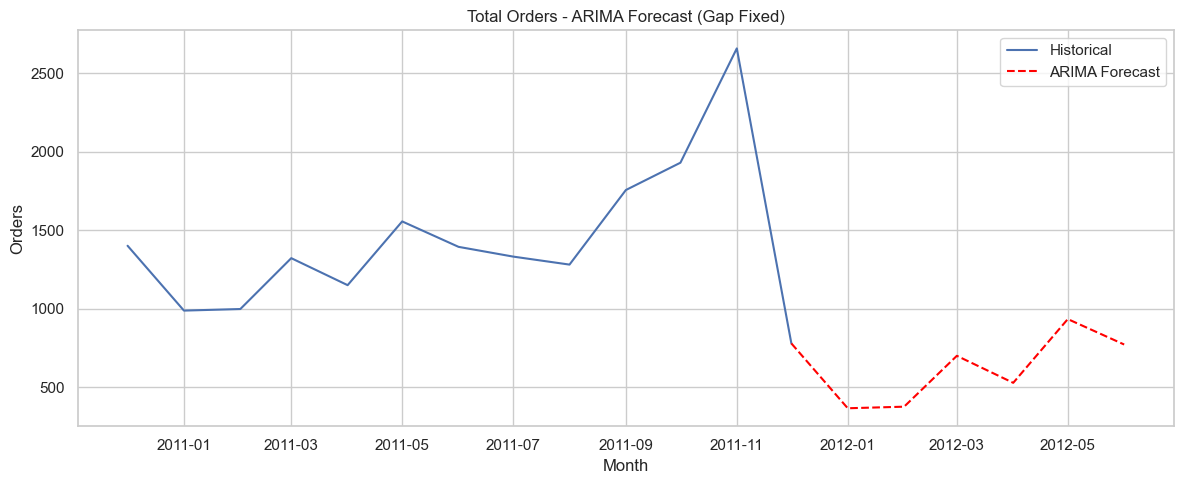

In [65]:
# Fit ARIMA model
model_o = SARIMAX(monthly_kpis['TotalOrders'], order=(1,1,1), seasonal_order=(1,1,1,12))
results_o = model_o.fit()

# Forecast 6 future steps
forecast_o = results_o.get_forecast(steps=6)
pred_mean_o = forecast_o.predicted_mean

# Fix gap by including last historical month in forecast line
last_point_o = monthly_kpis['TotalOrders'].iloc[-1]
last_month_o = monthly_kpis.index[-1]
pred_mean_o_fixed = pd.concat([pd.Series([last_point_o], index=[last_month_o]), pred_mean_o])

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_kpis.index, monthly_kpis['TotalOrders'], label='Historical')
plt.plot(pred_mean_o_fixed.index, pred_mean_o_fixed, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('Total Orders - ARIMA Forecast (Gap Fixed)')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
orders_forecast_df = pred_mean_o_fixed.reset_index()
orders_forecast_df.columns = ['Month', 'Orders_ARIMA']
orders_forecast_df.to_csv("../data/orders_arima_forecast.csv", index=False)

In [69]:
from sklearn.metrics import mean_squared_error


In [71]:
# Step 1: Imports
import pandas as pd
from sklearn.metrics import mean_squared_error

# Step 2: Load your data (adjust path if needed)
kpis = pd.read_csv('../data/monthly_kpis.csv')
revenue_forecast = pd.read_csv('../data/revenue_forecast.csv')
revenue_arima = pd.read_csv('../data/arima_revenue_forecast.csv')

# Step 3: Ensure datetime
kpis['Month'] = pd.to_datetime(kpis['Month'])
revenue_forecast['ds'] = pd.to_datetime(revenue_forecast['ds'])
revenue_arima['Month'] = pd.to_datetime(revenue_arima['Month'])

# Step 4: Select KPI (use Total Revenue for now)
forecast_col = 'TotalRevenue'

# Step 5: Get actual values (last 6 months of actuals)
actual = kpis[forecast_col].tail(6).reset_index(drop=True)

# Step 6: Get forecasted values
prophet_pred = revenue_forecast['yhat'].head(6).reset_index(drop=True)
arima_pred = revenue_arima[revenue_arima['Month'] > kpis['Month'].max()][revenue_arima.columns[-1]].head(6).reset_index(drop=True)

# Step 7: Calculate MSE
mse_prophet = mean_squared_error(actual, prophet_pred)
mse_arima = mean_squared_error(actual, arima_pred)

# Step 8: Output(Mean Squared Error: lower means good)
print(" Prophet MSE:", round(mse_prophet, 2))
print("ARIMA MSE:  ", round(mse_arima, 2))


📉 Prophet MSE: 121701207973.16
📉 ARIMA MSE:   154654596871.84
